# Financial Data Exploration

This notebook performs a comprehensive exploration of the financial dataset provided for the case study.


## Import Libraries and Setup Environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys

root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_path)

# Set style for visualisations
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("muted")

## Define Data Exploration Function


In [2]:
def explore_financial_data(file_path):
    """
    Comprehensive exploration of the financial dataset
    """
    print(f"Loading financial data from: {file_path}")

    # Load data
    df = pd.read_excel(file_path)

    # Basic information
    print("\n== DATASET OVERVIEW ==")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())

    # Clean column names (strip whitespace)
    df.columns = [col.strip() if isinstance(col, str) else col for col in df.columns]
    print("\nCleaned column names:")
    print(df.columns.tolist())

    # Data types
    print("\n== DATA TYPES ==")
    print(df.dtypes)

    # Missing values
    print("\n== MISSING VALUES ==")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found")

    # Numerical statistics
    print("\n== NUMERICAL STATISTICS ==")
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(df[numerical_cols].describe().T)

    # Categorical features
    print("\n== CATEGORICAL FEATURES ==")
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    for col in categorical_cols:
        print(f"\n{col} - {df[col].nunique()} unique values:")
        print(df[col].value_counts().head())

    # Analysis by Segment
    print("\n== ANALYSIS BY SEGMENT ==")
    segment_analysis = (
        df.groupby("Segment")
        .agg(
            {
                "Sales": "sum",
                "Profit": "sum",
                "Units Sold": "sum",
            }
        )
        .sort_values("Profit", ascending=False)
    )

    segment_analysis["Profit Margin (%)"] = (
        segment_analysis["Profit"] / segment_analysis["Sales"]
    ) * 100
    print(segment_analysis)

    # Analysis by Country
    print("\n== ANALYSIS BY COUNTRY ==")
    country_analysis = (
        df.groupby("Country")
        .agg(
            {
                "Sales": "sum",
                "Profit": "sum",
                "Units Sold": "sum",
            }
        )
        .sort_values("Profit", ascending=False)
    )

    country_analysis["Profit Margin (%)"] = (
        country_analysis["Profit"] / country_analysis["Sales"]
    ) * 100
    print(country_analysis)

    # Analysis by Product
    print("\n== ANALYSIS BY PRODUCT ==")
    product_analysis = (
        df.groupby("Product")
        .agg(
            {
                "Sales": "sum",
                "Profit": "sum",
                "Units Sold": "sum",
            }
        )
        .sort_values("Profit", ascending=False)
    )

    product_analysis["Profit Margin (%)"] = (
        product_analysis["Profit"] / product_analysis["Sales"]
    ) * 100
    print(product_analysis)

    # Analysis by Discount Band
    print("\n== ANALYSIS BY DISCOUNT BAND ==")
    discount_analysis = (
        df.groupby("Discount Band")
        .agg(
            {
                "Sales": "sum",
                "Profit": "sum",
                "Discounts": "mean",
                "Units Sold": "sum",
            }
        )
        .sort_values("Profit", ascending=False)
    )

    discount_analysis["Profit Margin (%)"] = (
        discount_analysis["Profit"] / discount_analysis["Sales"]
    ) * 100
    print(discount_analysis)

    # Monthly trends
    print("\n== MONTHLY TRENDS ==")
    # Ensure Month Name is ordered correctly
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    df["Month Name"] = pd.Categorical(
        df["Month Name"], categories=month_order, ordered=True
    )
    monthly_analysis = (
        df.groupby("Month Name").agg({"Sales": "sum", "Profit": "sum"}).reset_index()
    )

    # Sort by the ordered Month Name
    monthly_analysis = monthly_analysis.sort_values("Month Name")
    print(monthly_analysis)

    # Segment by Country cross-analysis
    print("\n== SEGMENT PERFORMANCE BY COUNTRY ==")
    segment_country = df.pivot_table(
        index="Segment", columns="Country", values="Profit", aggfunc="sum"
    )
    print(segment_country)

    # Correlation matrix of numerical variables
    print("\n== CORRELATION MATRIX ==")
    correlation = df[numerical_cols].corr()
    print(
        correlation[["Sales", "Profit", "Units Sold"]].sort_values(
            "Profit", ascending=False
        )
    )

    # Create visualisations directory
    Path("visualisations").mkdir(exist_ok=True)

    return (
        df,
        segment_analysis,
        country_analysis,
        product_analysis,
        discount_analysis,
        monthly_analysis,
        correlation,
        segment_country,
    )

## Load and Explore the Financial Dataset


In [3]:
# Run the exploration
(
    df,
    segment_analysis,
    country_analysis,
    product_analysis,
    discount_analysis,
    monthly_analysis,
    correlation,
    segment_country,
) = explore_financial_data("data/Financial Sample.xlsx")

Loading financial data from: data/Financial Sample.xlsx

== DATASET OVERVIEW ==
Shape: (700, 16)

First 5 rows:
      Segment  Country    Product Discount Band  Units Sold  \
0  Government   Canada  Carretera           NaN      1618.5   
1  Government  Germany  Carretera           NaN      1321.0   
2   Midmarket   France  Carretera           NaN      2178.0   
3   Midmarket  Germany  Carretera           NaN       888.0   
4   Midmarket   Mexico  Carretera           NaN      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                    3          20      32370.0        0.0  32370.0  16185.0   
1                    3          20      26420.0        0.0  26420.0  13210.0   
2                    3          15      32670.0        0.0  32670.0  21780.0   
3                    3          15      13320.0        0.0  13320.0   8880.0   
4                    3          15      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month

C:\Users\wmichele\AppData\Local\Temp\ipykernel_38480\2371145139.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Month Name").agg({"Sales": "sum", "Profit": "sum"}).reset_index()


## Data Visualization

Creating various visualizations to understand the data better.


### 1. Profit by Segment


C:\Users\wmichele\AppData\Local\Temp\ipykernel_38480\19385129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_analysis.index, y=segment_analysis["Profit"], palette="viridis")


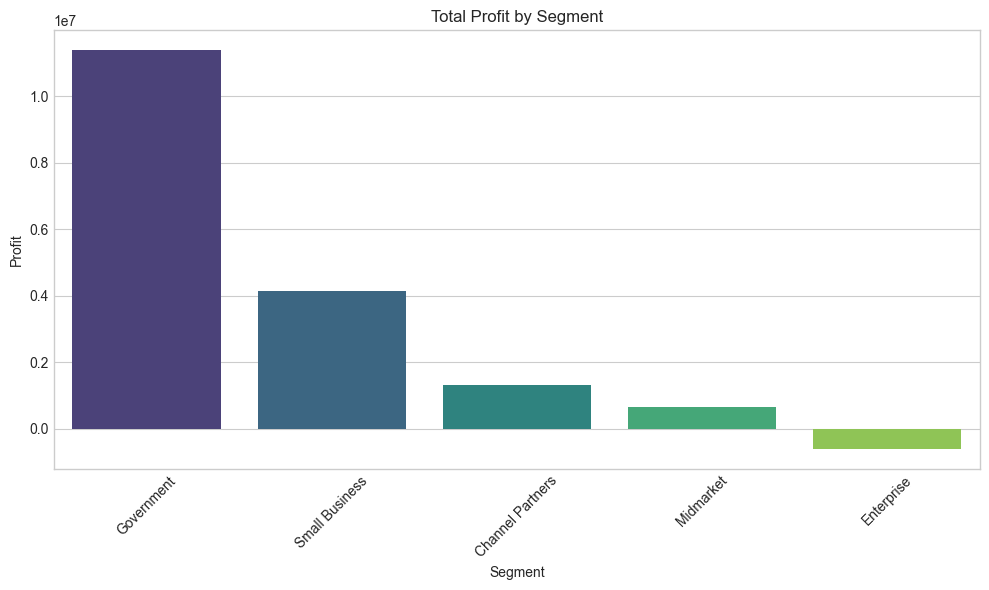

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis.index, y=segment_analysis["Profit"], palette="viridis")
plt.title("Total Profit by Segment")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualisations/profit_by_segment.png")
plt.show()

### 2. Profit Margin by Segment


C:\Users\wmichele\AppData\Local\Temp\ipykernel_38480\4243480595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


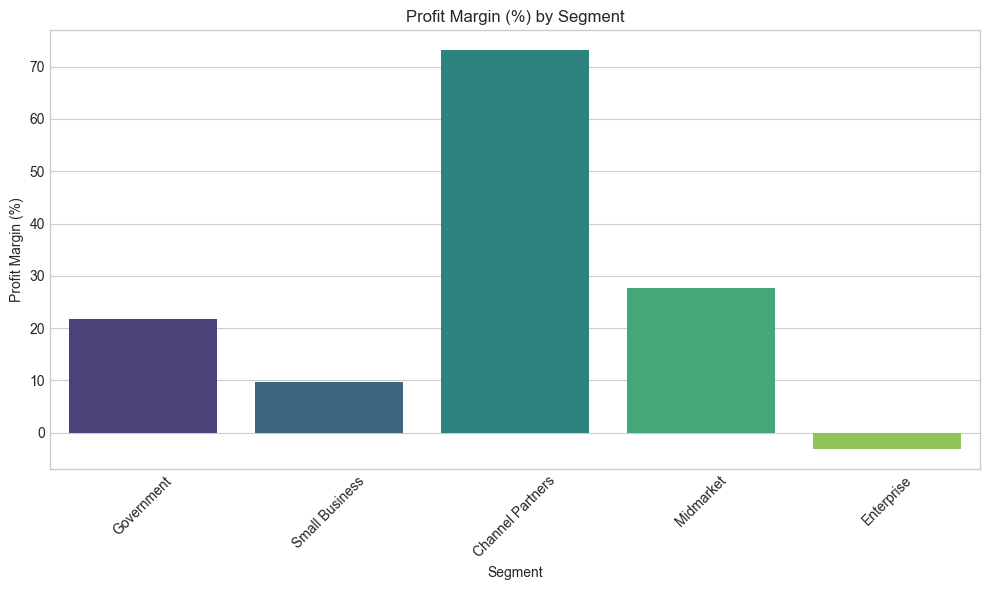

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=segment_analysis.index,
    y=segment_analysis["Profit Margin (%)"],
    palette="viridis",
)
plt.title("Profit Margin (%) by Segment")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualisations/profit_margin_by_segment.png")
plt.show()

### 3. Monthly Sales and Profit Trends


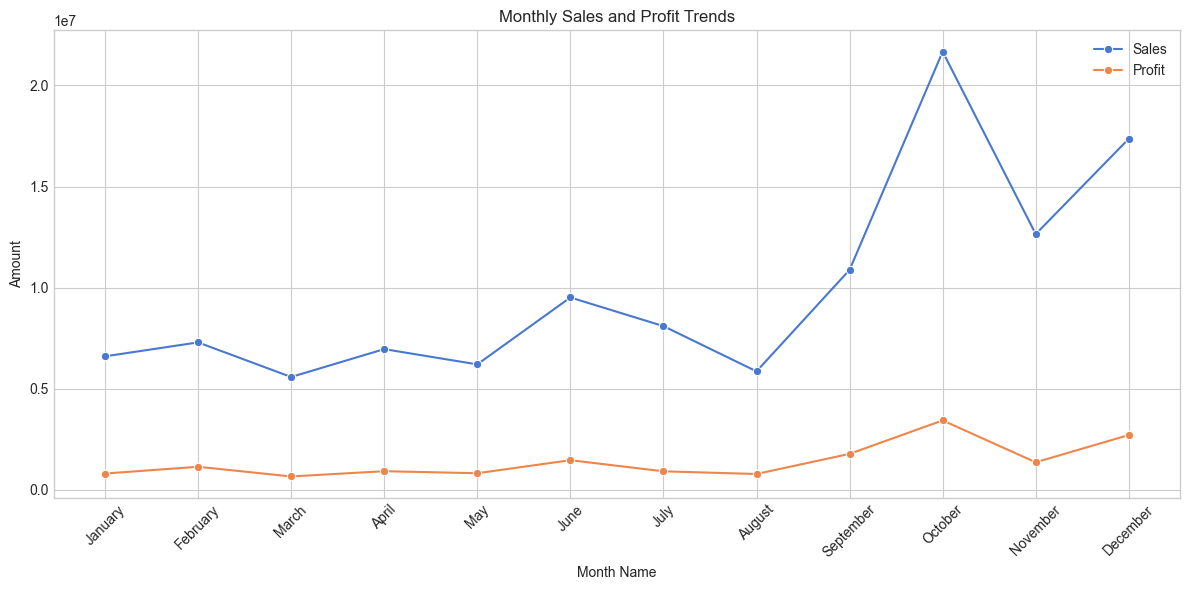

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_analysis, x="Month Name", y="Sales", marker="o", label="Sales"
)
sns.lineplot(
    data=monthly_analysis, x="Month Name", y="Profit", marker="o", label="Profit"
)
plt.title("Monthly Sales and Profit Trends")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("visualisations/monthly_trends.png")
plt.show()

### 4. Discount Band vs Profit Margin


C:\Users\wmichele\AppData\Local\Temp\ipykernel_38480\252667219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


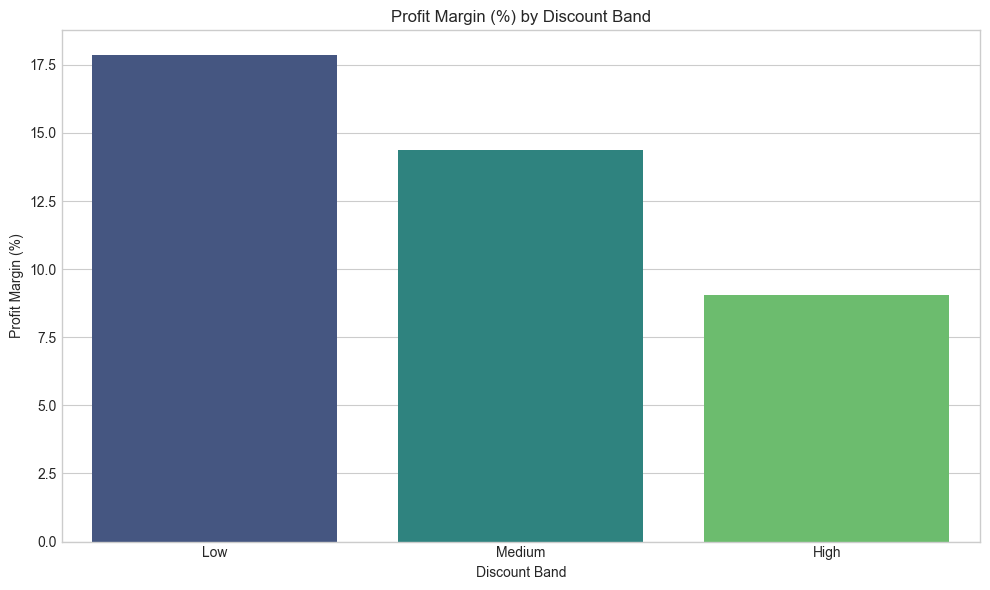

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=discount_analysis.index,
    y=discount_analysis["Profit Margin (%)"],
    palette="viridis",
)
plt.title("Profit Margin (%) by Discount Band")
plt.ylabel("Profit Margin (%)")
plt.tight_layout()
plt.savefig("visualisations/profit_margin_by_discount.png")
plt.show()

### 5. Correlation Heatmap


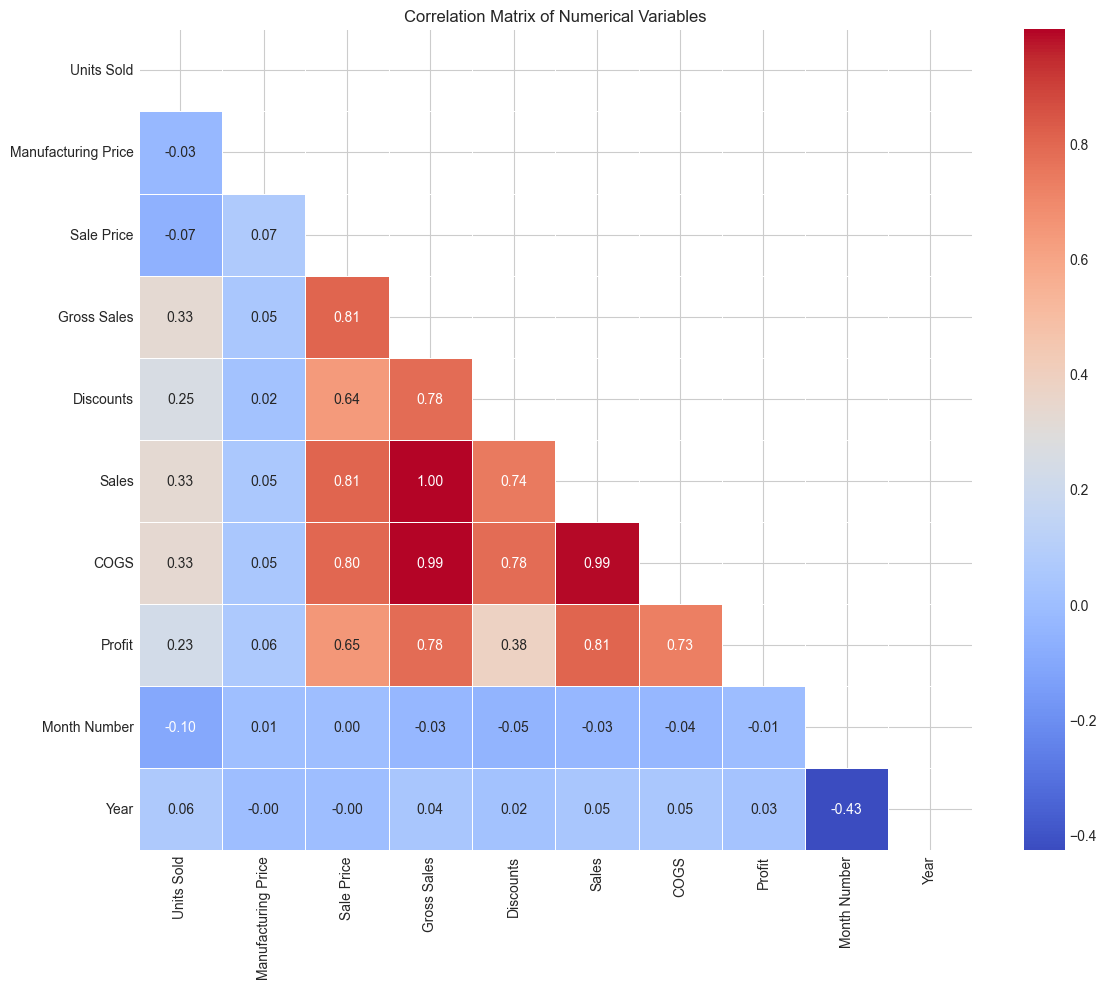

In [8]:
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(
    correlation, annot=True, cmap="coolwarm", mask=mask, fmt=".2f", linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.savefig("visualisations/correlation_heatmap.png")
plt.show()

### 6. Country Profit Comparison


C:\Users\wmichele\AppData\Local\Temp\ipykernel_38480\2412292120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_analysis.index, y=country_analysis["Profit"], palette="muted")


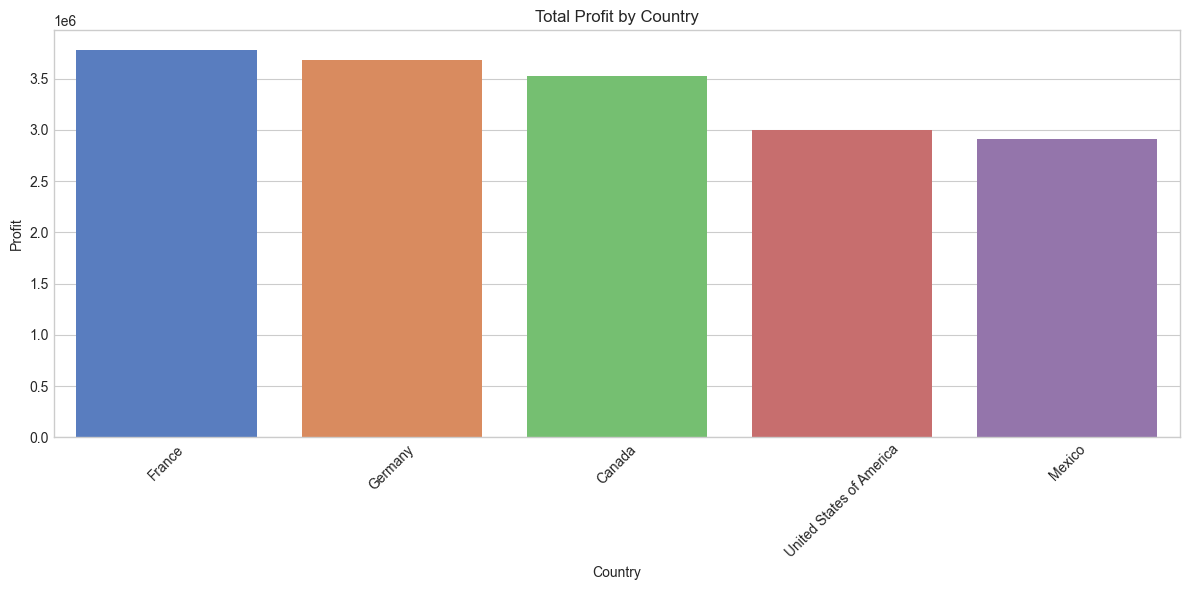

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_analysis.index, y=country_analysis["Profit"], palette="muted")
plt.title("Total Profit by Country")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visualisations/profit_by_country.png")
plt.show()

### 7. Segment by Country Heatmap


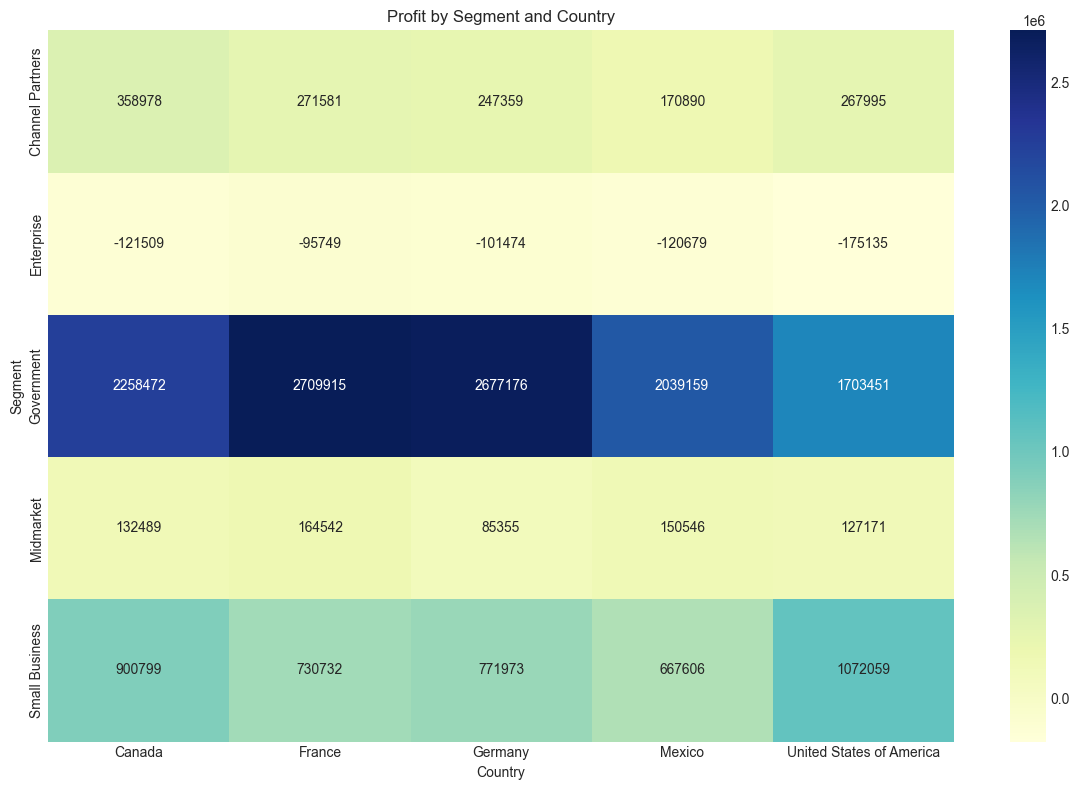

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(segment_country, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Profit by Segment and Country")
plt.tight_layout()
plt.savefig("visualisations/segment_country_heatmap.png")
plt.show()

## Key Insights from Financial Data Analysis


In [11]:
# Potential insights based on our exploration
print("\n== POTENTIAL INSIGHTS ==")

# Check Enterprise segment profit (we saw it was negative)
if "Enterprise" in segment_analysis.index:
    enterprise_profit = segment_analysis.loc["Enterprise", "Profit"]
    if enterprise_profit < 0:
        print(
            f"1. The Enterprise segment shows a negative profit (${enterprise_profit:,.2f}), requiring further investigation."
        )

# Check discount band effect on profit margin
if len(discount_analysis) > 1:
    if (
        discount_analysis["Profit Margin (%)"].iloc[-1]
        < discount_analysis["Profit Margin (%)"].iloc[0]
    ):
        highest_band = discount_analysis.index[-1]
        highest_margin = discount_analysis["Profit Margin (%)"].iloc[0]
        lowest_margin = discount_analysis["Profit Margin (%)"].iloc[-1]
        print(
            f"2. Higher discounts correlate with lower profit margins. No discount has {highest_margin:.2f}% margin, while {highest_band} discount band has only {lowest_margin:.2f}% margin."
        )

# Check for monthly trends
if "October" in monthly_analysis["Month Name"].values:
    oct_sales = monthly_analysis[monthly_analysis["Month Name"] == "October"][
        "Sales"
    ].values[0]
    avg_sales = monthly_analysis["Sales"].mean()
    if oct_sales > avg_sales * 1.5:  # If October sales are 50% higher than average
        print(
            f"3. October shows unusually high sales (${oct_sales:,.2f}), which is {oct_sales/avg_sales:.1f}x the monthly average."
        )

# Check for country-specific insights
if not country_analysis.empty:
    best_country = country_analysis.index[0]
    best_margin = country_analysis["Profit Margin (%)"].max()
    best_margin_country = country_analysis["Profit Margin (%)"].idxmax()
    print(
        f"4. {best_country} generates the highest total profit, while {best_margin_country} has the best profit margin at {best_margin:.2f}%."
    )

# Product insights
if not product_analysis.empty:
    best_product = product_analysis.index[0]
    best_product_margin = product_analysis["Profit Margin (%)"].max()
    best_margin_product = product_analysis["Profit Margin (%)"].idxmax()
    print(
        f"5. {best_product} is the most profitable product overall, while {best_margin_product} has the highest profit margin at {best_product_margin:.2f}%."
    )


== POTENTIAL INSIGHTS ==
1. The Enterprise segment shows a negative profit ($-614,545.62), requiring further investigation.
2. Higher discounts correlate with lower profit margins. No discount has 17.87% margin, while High discount band has only 9.07% margin.
3. October shows unusually high sales ($21,671,431.02), which is 2.2x the monthly average.
4. France generates the highest total profit, while Germany has the best profit margin at 15.66%.
5. Paseo is the most profitable product overall, while Amarilla has the highest profit margin at 15.86%.
